 <h1   align = 'center'><font color = '#00008B'> Bangalore House Price Prediction</h1>

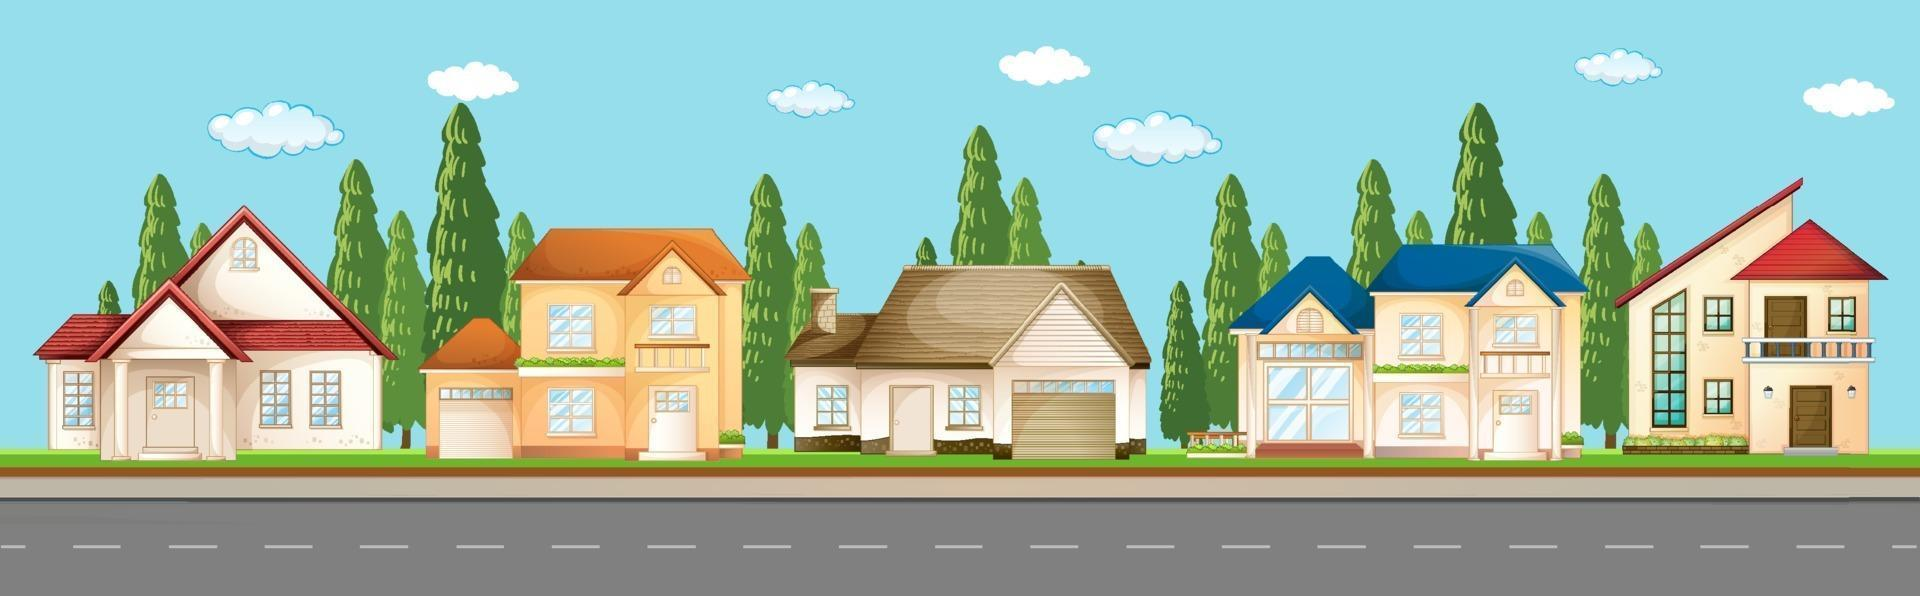

## <font color = '#00008B'>Problem Statement
Many People do intense search to buy the perfect house for themselves.Price is a major factor that people always consider before buying a house and Buying a house in the Silicon Valley of India,Bangalore can we challenging.So to ease this data about varies house located in different place were collected and using this  a supervised Machine Learning model was created.This model will help in predicting the price of the house based on the factor like BHK,Locality etc which help new buyers to get a rough idea on the price.

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bangalore/banglore.csv


## <font color = '#00008B'> Data Definition</font>

**AREA_TYPE :** Categories of Area

**AVAILABILITY :** Propery Availability

**LOCATION :** Property Location

**SIZE :** Number of Bedrooms

**SOCIETY :** Sociaty where Property

**TOTAL_SQFT :** Total Square feet of the property

**BATH :** Number of Bathrooms

**BALCONY :** Number of Balconies

**PRICE :** Price of the property in Lakhs

## <font color = '#00008B'> Table of Contents

1. **[Import Libraries](#import_lib)**
2. **[Read Data](#Read_Data)**
3. **[Data Analysis and Preparation](#data_preparation)**
    - 3.1 - [Understand the Data](#Data_Understanding)
        - 3.1.1 - [Data Dimension](#Data_Shape)
        - 3.1.2 - [Data Types](#Data_Types)
        - 3.1.3 - [Duplicate Values](#Duplicate_Value)
        - 3.1.4 - [Summary Statistics](#Summary_Statistics)  
        - 3.1.5 - [Missing Values](#Missing_Values)
        - 3.1.6 - [Analyze Categorical Variables](#categorical)
        - 3.1.7 - [Analyze Numerical Variable](#Numerical_Variable)
        - 3.1.8 - [Outlier Treatment Using IQR](#outliers)
        - 3.1.9 - [Correlations](#correlation)
    - 3.2 - [Prepare the Data](#Data_Preparation)
        - 3.2.1 - [Check for Normality](#Normality)
        - 3.2.2 - [Dummy Encoding of Categorical Variables](#dummy)
4. **[Linear Regression (OLS)](#LinearRegression)**

<a id='import_lib'></a>
## 1. Import Libraries

In [2]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None

<a id='Read_Data'></a>
## 2. Read Data
Read and Display the first 5 observation:

In [3]:
# Reading the data from csv file using pd.read_csv
house_price_df = pd.read_csv('/kaggle/input/bangalore/banglore.csv')


# Displaying the first 5 observation using .head()
house_price_df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


<a id='data_preparation'></a>
## 3. Data Analysis and Preparation

<a id='Data_Understanding'></a>
### 3.1 Understand the Dataset

<a id='Data_Shape'></a>
### 3.1.1 Data Dimension
To Know the dimension of Data:

In [4]:
# use .shape to find the dimension of dataset
print(f'Number of Observation: {house_price_df.shape[0]}')
print(f'Number of Feature or Column:{house_price_df.shape[1]}')

Number of Observation: 13320
Number of Feature or Column:9


<a id='Data_Types'></a>
### 3.1.2 Data Types
Checking for datatype of each column and fixing the incorrect datatype.

In [5]:
# use .dtype to find the datatype for each column
house_price_df.dtypes

area_type        object
availability     object
location         object
size             object
society          object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

- total_sqft should be numerical variable and units for it sqft 
- size column should be numerical

In [6]:
# Renaming the Size column to BHK for better understanding
# .rename to rename the column
house_price_df = house_price_df.rename(columns={'size':'BHK'})

In [7]:
# extracting only the numerical value from BHK column 
def numerical_part(x):
    try:
        number = int(re.findall(r'\d+',x)[0])
        return number
    except:
        return x

# Replacing value to numerical value   
house_price_df.BHK = house_price_df.BHK.apply(lambda x:numerical_part(x))

In [8]:
# As total_sqft is a categorically variable,checking for unique value or units 
def units(x):
    l1 = re.findall(r'\D+\D+',x)
    try:
        if l1[0]==' - ':
            return 'Sqft'
        else:
            return l1[0]
    except:
        return 'Sqft'

In [9]:
# unique value/units in total_sqft
house_price_df.total_sqft.apply(lambda x:units(x)).unique()

array(['Sqft', 'Sq. Meter', 'Perch', 'Sq. Yards', 'Acres', 'Cents',
       'Guntha', 'Grounds'], dtype=object)

- As the units are of different scale need to replace it to common units that is sqft.

In [10]:
house_price_df[house_price_df['total_sqft']=='1783 - 1878']

,area_type,availability,location,BHK,society,total_sqft,bath,balcony,price
12184,Super built-up Area,18-Dec,Hennur,3.0,Exitym,1783 - 1878,3.0,0.0,84.205


- Some Sqft are in range, So average of the 2 points will be taken.

In [11]:
# function for converting into same units
def common_units(x):
    tokens = x.split('-')
    try:
        if len(tokens) == 2:
            return (float(tokens[0])+float(tokens[1]))
        else:
            tok = tokens[0]
            units = re.findall(r'\D+\D+',tok)[0]
            if units == 'Sq. Meter':
                number = tok.split(units)[0]
                return 10.7639*float(number)
            elif units == 'Perch':
                number = tok.split(units)[0]
                return 272.25*float(number)
            elif units == 'Sq. Yards':
                number = tok.split(units)[0]
                return 9*float(number)
            elif units == 'Acres':
                number = tok.split(units)[0]
                return 43560*float(number)
            elif units == 'Cents':
                number = tok.split(units)[0]
                return 435.6*float(number)
            elif units == 'Guntha':
                number = tok.split(units)[0]
                return 1089*float(number)
            elif units == 'Grounds':
                number = tok.split(units)[0]
                return 2400*float(number)
            else:
                return (tokens[0])
    except:
        return(tokens[0])

In [12]:
## applying the fucntion to the column: - 'total_sqft'
house_price_df.total_sqft = house_price_df.total_sqft.apply(common_units)

In [13]:
# changing datatype for the column total_sqft from categorical to numerical
# .astype() function for changing the datatype
house_price_df.total_sqft = house_price_df.total_sqft.astype(float)

In [14]:
# Re-checking the datatype
house_price_df.dtypes

area_type        object
availability     object
location         object
BHK             float64
society          object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

- All the datatype are fixed.

<a id='Duplicate_Value'></a>
### 3.1.3 Duplicate Values

In [15]:
# checking for duplicates value
house_price_df.duplicated().sum()

529

In [16]:
# dropping duplicate
house_price_df.drop_duplicates(inplace=True)

<a id='Summary_Statistics'></a>
### 3.1.4 Summary Statistics

In [17]:
# Summary Statistic for numerical variable
house_price_df.select_dtypes(include=np.number).describe().T

,count,mean,std,min,25%,50%,75%,max
BHK,12775.0,2.817847,1.311841,1.0,2.0,3.0,3.0,43.0
total_sqft,12791.0,1965.167931,17633.214448,1.0,1100.0,1291.0,1700.0,1306800.0
bath,12718.0,2.708602,1.357764,1.0,2.0,2.0,3.0,40.0
balcony,12186.0,1.582308,0.822536,0.0,1.0,2.0,2.0,3.0
price,12791.0,114.317646,151.480310,8.0,50.0,73.0,121.0,3600.0


- Some column has some missing value
- BHK,total_sqft,bath,price has outlier present in it.
- Some house are without balcony also

In [18]:
# Summary Statistic for categorically variable
house_price_df.select_dtypes(include=object).describe()

,area_type,availability,location,society
count,12791,12791,12790,7463
unique,4,81,1305,2688
top,Super built-up Area,Ready To Move,Whitefield,GrrvaGr
freq,8317,10172,523,68


- Most of house are ready to move
- Whitefield has maximum number of house in bangalore that is for sale
- Society has many missing value

<a id='Missing_Values'></a>
### 3.1.5 Missing Values

In [19]:
# missing value for each column
Total = house_price_df.isnull().sum().sort_values(ascending=False) 

# Percenatge of missing value for each column
Percent = (house_price_df.isnull().sum()*100/house_price_df.isnull().count()).sort_values(ascending=False)   

# concat the 'Total' and 'Percent' columns using 'concat' function
missing_data = pd.concat([Total, Percent], axis = 1, keys = ['Total', 'Percentage of Missing Values'])

# print the missing data
missing_data

,Total,Percentage of Missing Values
society,5328,41.654288
balcony,605,4.729888
bath,73,0.570714
BHK,16,0.125088
location,1,0.007818
area_type,0,0.000000
availability,0,0.000000
total_sqft,0,0.000000
price,0,0.000000


- Society column has many 41% percentage of missing, we can drop it

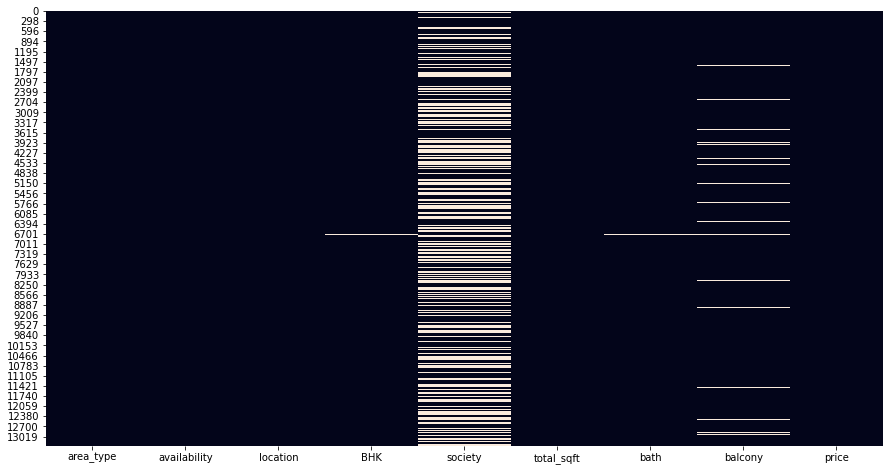

In [20]:
# visualization for missing value
plt.figure(figsize=(15, 8))

# plot heatmap to check null values

sns.heatmap(house_price_df.isnull(), cbar=False)

# display the plot
plt.show()

- Society,bath,balcony,BHK columns has null value

In [21]:
# dropping Society and availablity column
house_price_df = house_price_df.drop(['society','availability'],1)

# droppinf null value for each column as very small percentage
house_price_df.dropna(inplace=True)

In [22]:
# reseting index
house_price_df.reset_index(drop=True,inplace=True)

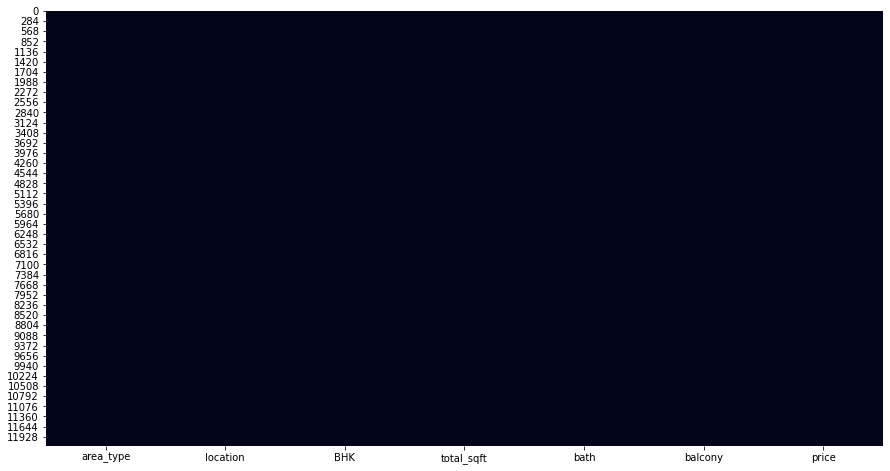

In [23]:
# visualization for missing value
plt.figure(figsize=(15, 8))

# plot heatmap to check null values

sns.heatmap(house_price_df.isnull(), cbar=False)

# display the plot
plt.show()

- No Null value

<a id='categorical'></a>
### 3.1.6 Analyze Categorical Variables


In [24]:
# Frequency for each loaction
location_freq = pd.Series(house_price_df.location.value_counts()).head(25)
locations = pd.DataFrame(location_freq).reset_index().rename(columns={'index':'location','location':'frequency'})

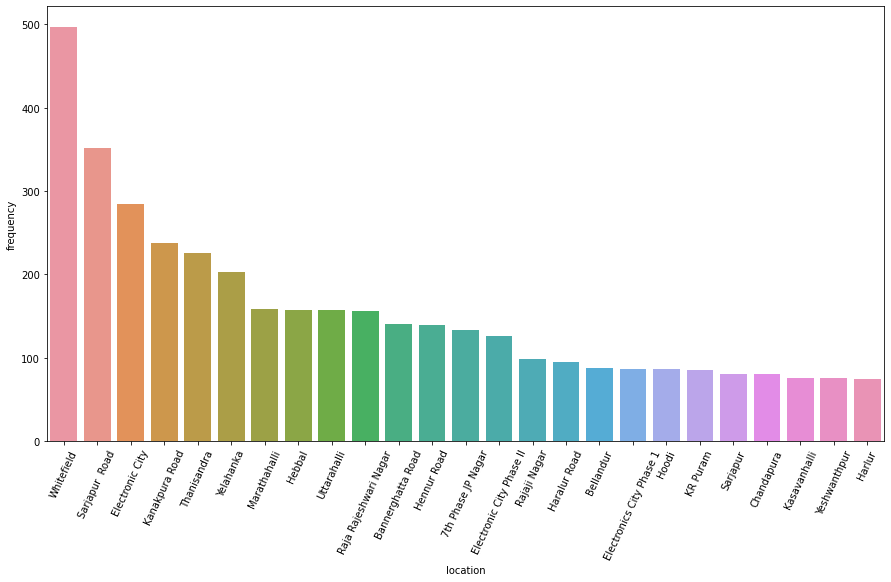

In [25]:
# barplot

plt.figure(figsize=(15,8))

sns.barplot(locations['location'],locations['frequency'])

plt.xticks(rotation=65)

plt.show()

- Whitefield followed by Sarjapur Road have highest number of house for sale.

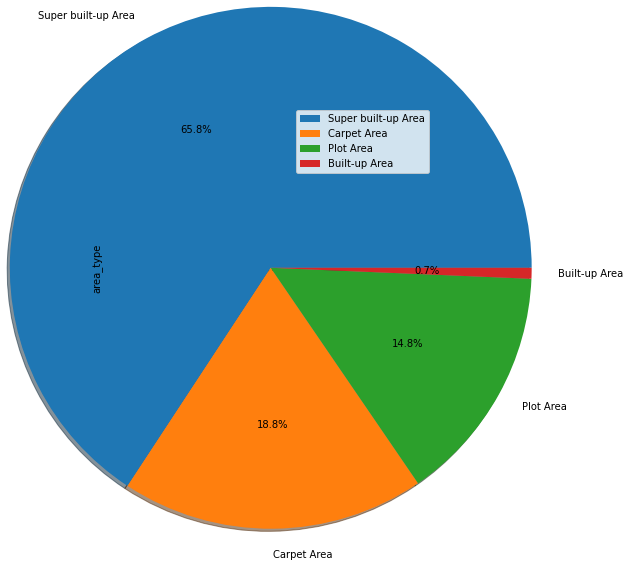

In [26]:
mylabels = ['Super built-up Area','Carpet Area','Plot Area','Built-up Area']
plt.figure(figsize=(6,6))
(house_price_df['area_type'].value_counts()).plot.pie(autopct="%.1f%%",shadow=True,labels=mylabels,radius=2)
plt.legend(loc ='best')
plt.show()

- 65.8% constitute Super built up Area

In [27]:
# Summary Statistic for categorically variable
house_price_df.select_dtypes(include=object).describe()

,area_type,location
count,12185,12185
unique,4,1265
top,Super built-up Area,Whitefield
freq,8012,497


<AxesSubplot:xlabel='area_type', ylabel='price'>

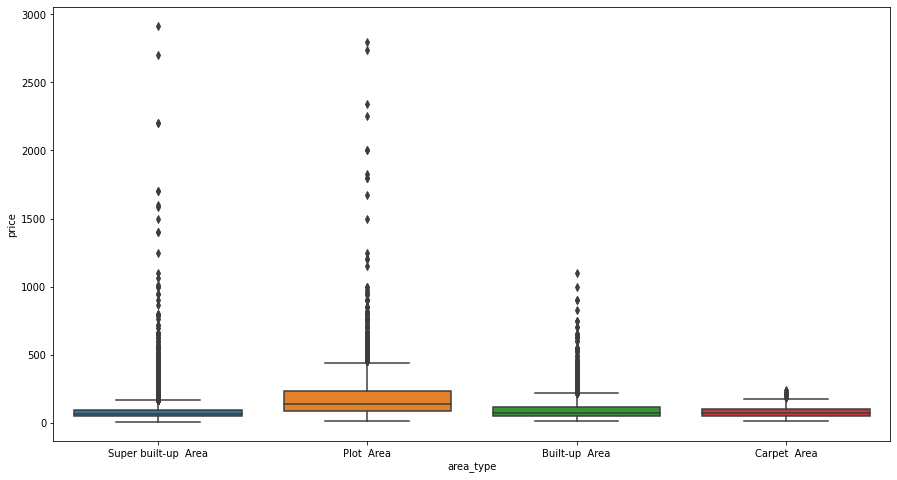

In [28]:
# Boxplot of price and location
plt.figure(figsize=(15,8))
sns.boxplot(house_price_df['area_type'],house_price_df['price'])

- Presence of outlier in price with respect to Area-type

In [29]:
import plotly.express as px
fig = px.box(house_price_df,x='location',y='price')
fig.show()

- Outlier are present in price with respect to location

<a id='Numerical_Variable'></a>
### 4.1.7 Analyze Numerical Variable

<AxesSubplot:title={'center':'Frequency of Balcony'}, xlabel='balcony', ylabel='count'>

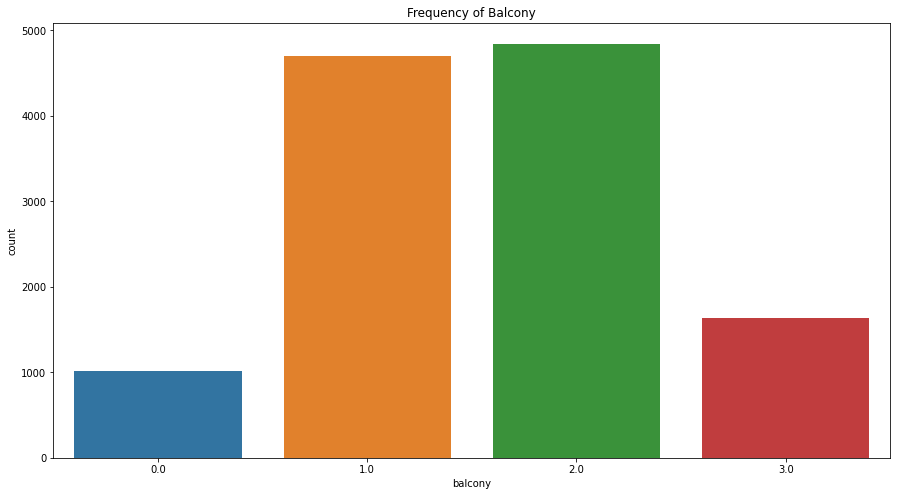

In [30]:
# balcony
plt.figure(figsize=(15,8))
plt.title('Frequency of Balcony')
sns.countplot(house_price_df['balcony'])

- Most house has 1 or 2 balcony

<AxesSubplot:title={'center':'Frequency of BHK'}, xlabel='BHK', ylabel='count'>

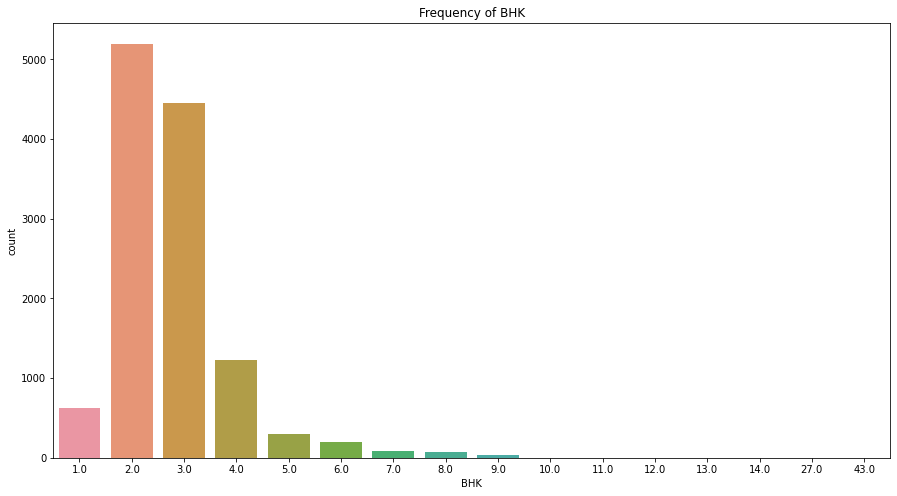

In [31]:
# BHK
plt.figure(figsize=(15,8))
plt.title('Frequency of BHK')
sns.countplot(house_price_df['BHK'])

- Most house are 2 or 3 BHK

Text(0.5, 0, 'Price')

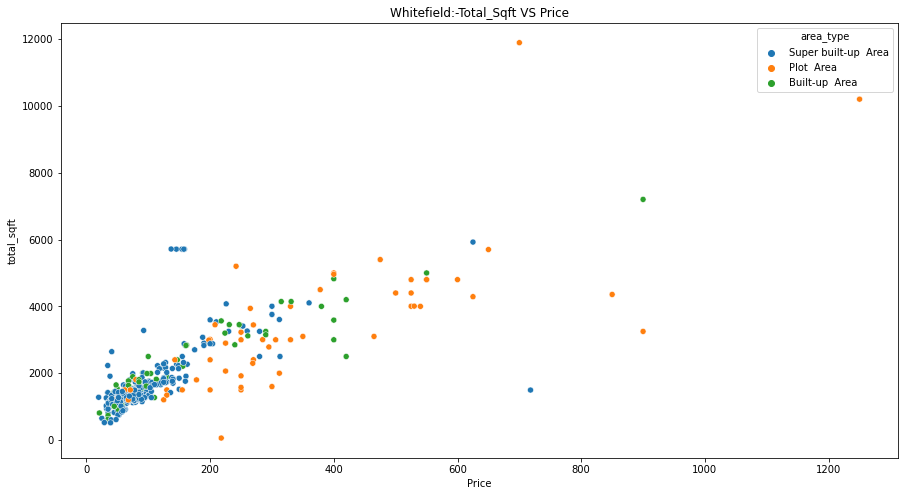

In [32]:
# scatterplot between price and total_sqft for whitfield area
plt.figure(figsize=(15,8))
place = 'Whitefield'   # here location can be changed,as whitefield had highest number of house so selected it
df = house_price_df[house_price_df['location']== place]  
sns.scatterplot(df['price'],df['total_sqft'],hue=df['area_type'])
plt.title('Whitefield:-Total_Sqft VS Price')
plt.xlabel('Price')

- As total area increase the price also increase

<AxesSubplot:title={'center':'Boxplot for Numerical Variable'}>

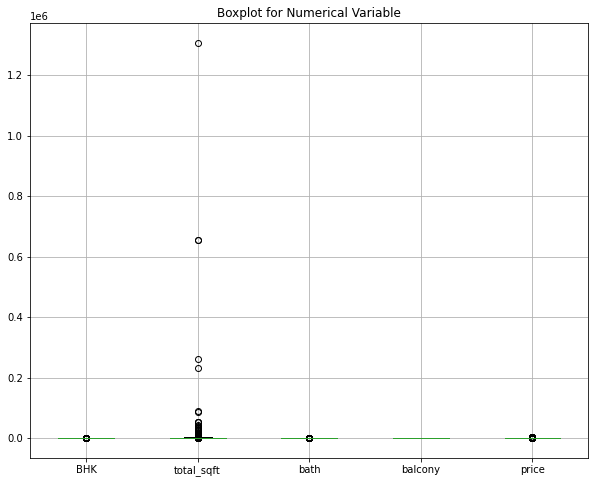

In [33]:
# Boxplot for outlier analysis
plt.figure(figsize=(10,8))
plt.title('Boxplot for Numerical Variable')
house_price_df.boxplot()

- Presence of outlier in numerical variable except in balcony

<a id='outliers'></a>
### 3.1.8 Outlier Treatment Using IQR

In [34]:
#1st Quantile
q1 = house_price_df.quantile(0.25)

#3rd Quantile
q3 = house_price_df.quantile(0.75)

#IQR
IQR = q3-q1
IQR

#Removing IQR
house_price_df = house_price_df[~((house_price_df < (q1 - 1.5 * IQR)) | (house_price_df > (q3 + 1.5 * IQR))).any(axis=1)]

In [35]:
# resetting index
house_price_df = house_price_df.reset_index(drop=True)

<a id='correlation'></a>
### 3.1.9 Correlation

<AxesSubplot:title={'center':'Correlation'}>

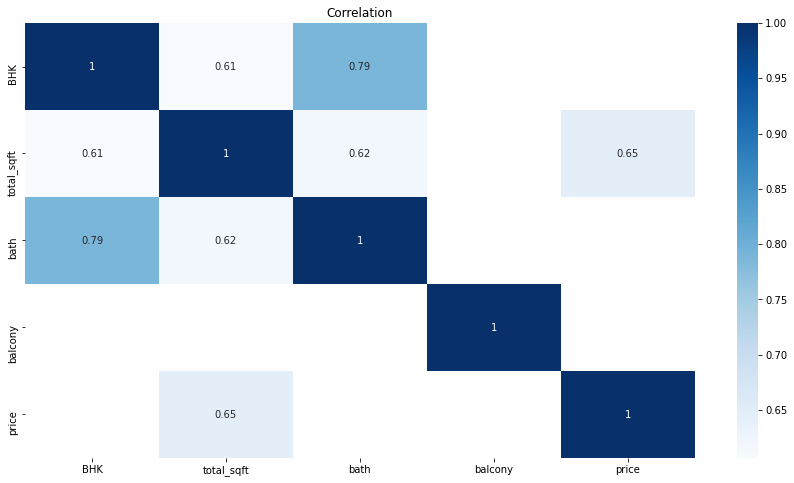

In [36]:
corr = house_price_df.corr()
plt.figure(figsize = (15,8))
#correlation between variable
plt.title('Correlation')
sns.heatmap(corr,mask = corr<0.6 ,annot= True,cmap = 'Blues')

- Correlation strong correlation between total_sqft and BHK

<a id='Data_Preparation'></a>
## 3.2 Prepare the Data

<a id='Normality'></a>
### 3.2.1 Check for Normality

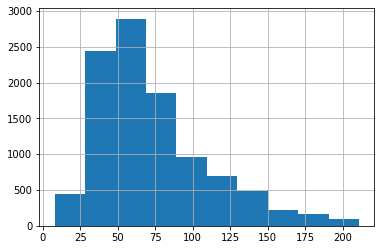

<Figure size 1080x576 with 0 Axes>

In [37]:
# check the distribution of target variable using hist()
house_price_df.price.hist()

plt.figure(figsize=(15,8))
# display the plot
plt.show()

- Price is heavily right skewed and not normally distributed

In [38]:
house_price_df.head()

,area_type,location,BHK,total_sqft,bath,balcony,price
0,Super built-up Area,Electronic City Phase II,2.0,1056.0,2.0,1.0,39.07
1,Built-up Area,Uttarahalli,3.0,1440.0,2.0,3.0,62.00
2,Super built-up Area,Lingadheeranahalli,3.0,1521.0,3.0,1.0,95.00
3,Super built-up Area,Kothanur,2.0,1200.0,2.0,1.0,51.00
4,Super built-up Area,Whitefield,2.0,1170.0,2.0,1.0,38.00


<a id='dummy'></a>
### 3.2.2 Dummy Encoding of Categorical Variables

In [39]:
# filter the numerical features in the dataset using select_dtypes()
df_numeric_features = house_price_df.select_dtypes(include=np.number)

In [40]:
# selecting only categorically
df_cat = house_price_df.select_dtypes(include=object)

In [41]:
df_dum = pd.get_dummies(df_cat)

In [42]:
# concatenating df_num_scaled and df_dum
house_price = pd.concat([df_numeric_features,df_dum],1)

In [43]:
# first 5 observation 
house_price.head()

,BHK,total_sqft,bath,balcony,price,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,location_ Anekal,location_ Banaswadi,location_ Basavangudi,location_ Bhoganhalli,location_ Devarabeesana Halli,location_ Devarachikkanahalli,location_ Electronic City,location_ Mysore Highway,location_ Rachenahalli,location_ Thanisandra,location_ Whitefield,location_ ittamadu,location_12th cross srinivas nagar banshankari 3rd stage,location_1st Block BEL Layout,location_1st Block HBR Layout,location_1st Block HRBR Layout,location_1st Block Jayanagar,location_1st Block Koramangala,location_1st Phase JP Nagar,location_1st Stage Domlur,location_1st Stage Indira Nagar,location_2nd Block Bel Layout,location_2nd Block Hrbr Layout,location_2nd Block Jayanagar,location_2nd Phase JP Nagar,location_2nd Phase Judicial Layout,location_2nd Stage Arekere Mico Layout,location_2nd Stage Nagarbhavi,"location_2nd phase jp nagar, jp nagar",location_3rd Block Banashankari,location_3rd Block HBR Layout,location_3rd Block Hrbr Layout,location_3rd Block Jayanagar,location_3rd Block Koramangala,location_3rd Phase Iti Layout,location_3rd Phase JP Nagar,location_3rd Stage Raja Rajeshwari Nagar,location_4th Block Jayanagar,location_4th Block Koramangala,location_4th Phase JP Nagar,location_4th T block Jayanagar,location_5th Block Hbr Layout,location_5th Block Jayanagar,location_5th Phase JP Nagar,location_5th Stage BEML Layout,location_6th Phase JP Nagar,location_6th block Koramangala,location_7th Block Jayanagar,location_7th Phase JP Nagar,location_8th Block Jayanagar,location_8th Phase JP Nagar,location_8th block Koramangala,location_9th Block Jayanagar,location_9th Phase JP Nagar,location_A Narayanapura,location_AECS Layout,location_AGS Layout,location_AMS Layout,location_Aavalahalli,location_Abbaiah Reddy Layout,location_Abbigere,location_Abshot Layout,location_Adarsh Nagar,location_Addischetan Layout,location_Adityanagar,location_Adugodi,location_Agara Village,location_Agrahara Dasarahalli,location_Air View Colony,location_Aishwarya Crystal Layout,location_Akash Nagar,location_Akshaya Nagar,location_Akshaya Vana,location_Akshayanagara East,location_Akshayanagara West,location_Akshya Nagar,location_Alfa Garden Layout,location_Allalasandra,location_Alur,location_Amam Enclave Layout,location_Amarjyothi Colony,location_Ambalipura,location_Ambedkar Colony,location_Ambedkar Nagar,location_Amblipura,location_Amco Colony,location_Amruthahalli,location_Amruthnagar,location_Anand Nagar,location_Anand nagar,location_Anandapura,location_Anantapura,location_Anantapuram,location_Ananth Nagar,"location_Ananthanagar Phase 1,Electronic City , phase 2","location_Ananthapura, T C palaya Main Road",location_Anathanagar,location_Andrahalli,location_Anekal,location_Anjana Nagar,location_Anjanapura,location_Anjappa Layout,location_Ankappa Layout,location_Annaiah Reddy Layout,"location_Annapoorneshwari Layout, JP nagar 7th phase",location_Annapurneshwari Nagar,location_Anugrah Layout,location_Anwar Layout,location_Ardendale,location_Arehalli,location_Arekempanahalli,location_Arekere,location_Arishinakunte,location_Ashirvad Colony,location_Ashok Nagar,location_Ashwath Nagar,location_Ashwathnagar,location_Ashwini layout,location_Asthagrama Layout,location_Atmananda Colony,location_Attibele,location_Attiguppe,location_Attur Layout,location_Austin Town,location_Avalahalli,location_Ayappa Nagar,location_B Channasandra,location_B Narayanapura,location_B Y Raveshwara Nagar,location_BAGUR,location_BAGUR ROAD,location_BCC Layout,location_BCMC Layout,location_BDS Layout,location_BEL Layout,location_BEL Road,location_BEML Layout,location_BEML Layout 5th stage,location_BHEL Layout,location_BSM Extension,location_BTM 1st Stage,location_BTM 2nd Stage,location_BTM 4th Stage,location_BTM Layout,location_Baba Nagar,location_Babusapalaya,location_Badavala Nagar,location_Badrappa Layout,location_Bagalakunte,location_Bagalur,location_Bagalur Main Road,location_Ba

<a id='LinearRegression'></a>
## 4. Linear Regression (OLS)

<a id='withLog'></a>
### 4.1 Multiple Linear Regression - Full Model

In [44]:
# splitting data into train and test
# add the intercept column to the dataset
house_prediction = house_price.drop('price',1)
X = sm.add_constant(house_prediction)

# extract the target variable from the data set
y = house_price['price']

# split data into train subset and test subset for predictor and target variables
# random_state: the seed used by the random number generator
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# check the dimensions of the train & test subset for 

# print dimension of predictors train set
print("The shape of X_train is:",X_train.shape)

# print dimension of predictors test set
print("The shape of X_test is:",X_test.shape)

# print dimension of target train set
print("The shape of y_train is:",y_train.shape)

# print dimension of target test set
print("The shape of y_test is:",y_test.shape)

The shape of X_train is: (7683, 1104)
The shape of X_test is: (2561, 1104)
The shape of y_train is: (7683,)
The shape of y_test is: (2561,)


In [45]:
# build a full model using OLS()
linreg_full_model = sm.OLS(y_train, X_train).fit()

# print the summary output
print(linreg_full_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     20.17
Date:                Mon, 16 Aug 2021   Prob (F-statistic):               0.00
Time:                        16:36:47   Log-Likelihood:                -33409.
No. Observations:                7683   AIC:                         6.877e+04
Df Residuals:                    6706   BIC:                         7.556e+04
Df Model:                         976                                         
Covariance Type:            nonrobust                                         
                                                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

- This model explains **75%** of the variation in dependent variable claim.
- The Durbin-Watson test statistics is **1.991~2** and indicates that there is no autocorrelation. 
- The Condition Number  **3.81e+21** which is greater than 1000,suggests that there is severe collinearity.
- Jarque-Bera test gives p_value less than **0.05**,which means that residual are not normally distributed.

In [46]:
# FUnction for calculating error
def train_rmse(model):
    y_pret = model.predict(X_train)
    mse = mean_squared_error(y_train,y_pret)
    rmse = np.sqrt(mse)
    return rmse

def test_rmse(model):
    y_pret = model.predict(X_test)
    mse = mean_squared_error(y_test,y_pret)
    rmse = np.sqrt(mse)
    return rmse

In [47]:
# create an empty dataframe to store the scores for various algorithms
score_card = pd.DataFrame(columns=['Model_Name', 'Alpha (Wherever Required)', 'l1-ratio', 'R-Squared',
                                       'Adj. R-Squared', 'Train RMSE', 'Test RMSE','Train_RMSE - Test_RMSE'])

In [48]:
new_score=pd.Series({'Model_Name':'MLR full model',
                    'Alpha (Wherever Required)':'-',
                    'l1-ratio':'-',
                    'R-Squared':linreg_full_model.rsquared,
                    'Adj. R-Squared':linreg_full_model.rsquared_adj,
                    'Train RMSE':train_rmse(linreg_full_model),
                    'Test RMSE':test_rmse(linreg_full_model),
                    'Train_RMSE - Test_RMSE':abs(train_rmse(linreg_full_model)-test_rmse(linreg_full_model))})
score_card = score_card.append(new_score,ignore_index=True)
score_card

,Model_Name,Alpha (Wherever Required),l1-ratio,R-Squared,Adj. R-Squared,Train RMSE,Test RMSE,Train_RMSE - Test_RMSE
0,MLR full model,-,-,0.745908,0.708927,18.7192,22.782854,4.063655
